# Akshitha Ajayan Juptyer HW5

## Wine Dataset

In [27]:
import numpy as np
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
from sklearn import preprocessing
samples, labels = load_wine(return_X_y=True)
samples = np.transpose(samples)

## Standardizaton of Data

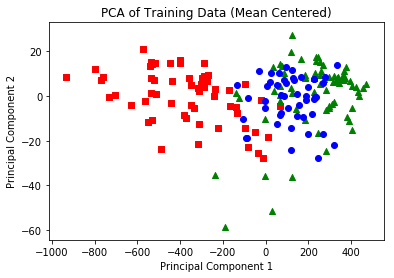

In [28]:
sumX = np.zeros((13, 1))
for i in range (0, 13):
    for j in range (0, 178):
        sumX[i, 0] = sumX[i, 0] + samples[i, j]
m = np.true_divide(sumX, 178)

mean_centered = np.zeros((13, 178))
for i in range (0, 13):
    for j in range (0, 178):
        mean_centered[i,j] = samples[i, j]-m[i, 0]
        
u, s, vh = LA.svd(mean_centered)
ukt = [u[:, 0], u[:, 1]]
ukt = np.asarray(ukt)

projx = np.zeros((2, 178))
for i in range(0, 178):
    projx[:, i] = np.matmul(ukt, mean_centered[:, i])

for i in range(0,178):
    if(labels[i]==0):
        plt.scatter(projx[0,i], projx[1,i], c='r', marker='s')
    if(labels[i]==1):
        plt.scatter(projx[0,i], projx[1,i], c='g', marker='^')
    if(labels[i]==2):
        plt.scatter(projx[0,i], projx[1,i], c='b', marker='o')
plt.title("PCA of Training Data (Mean Centered)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

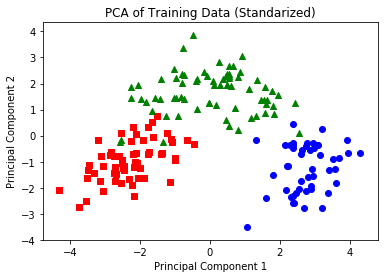

In [29]:
stddev= np.array([[np.std(attr)] for attr in mean_centered])
X = mean_centered/stddev

u, s, vh = LA.svd(X)
ukt = [u[:, 0], u[:, 1]]
ukt = np.asarray(ukt)

projx1 = np.zeros((2, 178))
for i in range(0, 178):
    projx1[:, i] = np.matmul(ukt, X[:, i])

for i in range(0,178):
    if(labels[i]==0):
        plt.scatter(projx1[0,i], projx1[1,i], c='r', marker='s')
    if(labels[i]==1):
        plt.scatter(projx1[0,i], projx1[1,i], c='g', marker='^')
    if(labels[i]==2):
        plt.scatter(projx1[0,i], projx1[1,i], c='b', marker='o')
plt.title("PCA of Training Data (Standarized)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The PCA features of the standardized (both centered and normalized) wine dataset would result in better classification because the data is more easily separable and thus easier to classify between the three classes compared to just the centered data. The centered data has much more overlap between the classes, making it harder for the classifer to accurately distingush between the three classes.

## Naive Bayes Classification

In [46]:
def probability(x, mean, std):
    return (1/math.sqrt(2*math.pi*(std**2)))*math.exp(-(x-mean)**2/(2*(std**2)))

def classify(projx):
    class1x = []
    class1y = []
    class2x = []
    class2y = []
    class3x = []
    class3y = []

    for i in range(0,140):
        if(labels[i]==0):
            class1x.append(projx[0,i]) 
            class1y.append(projx[1,i])
        if(labels[i]==1):
            class2x.append(projx[0,i]) 
            class2y.append(projx[1,i])
        if(labels[i]==2):
            class3x.append(projx[0,i]) 
            class3y.append(projx[1,i])

    mean1x = np.mean(class1x)
    mean1y = np.mean(class1y)
    mean2x = np.mean(class2x)
    mean2y = np.mean(class2y)
    mean3x = np.mean(class3x)
    mean3y = np.mean(class3y)

    std1x = np.var(class1x)
    std1y = np.var(class1y)
    std2x = np.var(class2x)
    std2y = np.var(class2y)
    std3x = np.var(class3x)
    std3y = np.var(class3y)

    my_labels = []
    for i in range(0, 178):
        p1 = probability(projx[0,i], mean1x, std1x)*probability(projx[1,i], mean1y, std1y)
        p2 = probability(projx[0,i], mean2x, std2x)*probability(projx[1,i], mean2y, std2y)
        p3 = probability(projx[0,i], mean3x, std3x)*probability(projx[1,i], mean3y, std3y)
        arr = [p1, p2, p3]
        my_labels.append(arr.index(max(arr)))
    return my_labels

def foldK(projx):
    new_projx = projx
    for i in range(0, 35):
        temp1 = new_projx[0,i]
        temp2 = new_projx[1,i]
        new_projx[0,i] = projx[0,177-i]
        new_projx[1,i] = projx[1,177-i]
        new_projx[0,177-i] = temp1
        new_projx[1,177-i] = temp2
    return new_projx

def foldKlabel(projx):
    new_projx = projx
    for i in range(0, 35):
        temp1 = new_projx[i]
        new_projx[i] = projx[177-i]
        new_projx[177-i] = temp1
    return new_projx

## Case I: My Classifier With PCA Centered Data

The errors of each of K fold trials is: [35, 35, 35, 25, 0]
The mean accuracy: 26.0
The variance of the accuracy: 184.0


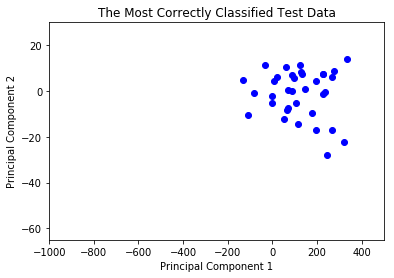

In [55]:
my_labels = classify(projx)
my_projx1 = foldK(projx)
my_labels1 = classify(my_projx1)
my_projx2 = foldK(my_projx1)
my_labels2 = classify(my_projx2)
my_projx3 = foldK(my_projx2)
my_labels3 = classify(my_projx3)
my_projx4 = foldK(my_projx3)
my_labels4 = classify(my_projx4)

error = [0, 0, 0, 0, 0]

for i in range(0, 35):
    if (my_labels[i]!=labels[i]):
        error[0] = error[0] +1
        
for i in range(0, 35):
    if (my_labels1[i]!=labels[35+i]):
        error[1] = error[1] +1
        
for i in range(0, 35):
    if (my_labels2[i]!=labels[70+i]):
        error[2] = error[2] +1
        
for i in range(0, 35):
    if (my_labels3[i]!=labels[105+i]):
        error[3] = error[3] +1
        
for i in range(0, 35):
    if (my_labels4[i]!=labels[140+i]):
        error[4] = error[4] +1
        
print("The errors of each of K fold trials is: " + str(error))
print("The mean accuracy: " + str(np.mean(error)))
print("The variance of the accuracy: " + str(np.var(error)))

for i in range(0,35):
    if(my_labels4[i]==0):
        plt.scatter(projx[0,140+i], projx[1,140+i], c='r', marker='s')
    if(my_labels4[i]==1):
        plt.scatter(projx[0,140+i], projx[1,140+i], c='g', marker='^')
    if(my_labels4[i]==2):
        plt.scatter(projx[0,140+i], projx[1,140+i], c='b', marker='o')
plt.title("The Most Correctly Classified Test Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axis([-1000, 500, -65, 30])
plt.show()

## Case II: My Classifier With PCA Standardized Data

The errors of each of K fold trials is: [2, 12, 35, 34, 33]
The mean accuracy: 23.2
The variance of the accuracy: 185.35999999999999


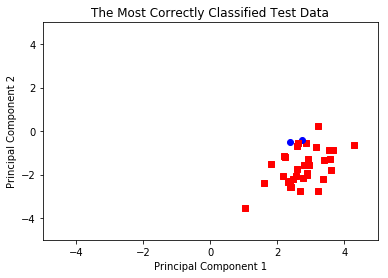

In [52]:
my_labels = classify(projx1)
my_projx1 = foldK(projx1)
my_labels1 = classify(my_projx1)
my_projx2 = foldK(my_projx1)
my_labels2 = classify(my_projx2)
my_projx3 = foldK(my_projx2)
my_labels3 = classify(my_projx3)
my_projx4 = foldK(my_projx3)
my_labels4 = classify(my_projx4)

error = [0, 0, 0, 0, 0]

for i in range(0, 35):
    if (my_labels[i]!=labels[i]):
        error[0] = error[0] +1
        
for i in range(0, 35):
    if (my_labels1[i]!=labels[35+i]):
        error[1] = error[1] +1
        
for i in range(0, 35):
    if (my_labels2[i]!=labels[70+i]):
        error[2] = error[2] +1
        
for i in range(0, 35):
    if (my_labels3[i]!=labels[105+i]):
        error[3] = error[3] +1
        
for i in range(0, 35):
    if (my_labels4[i]!=labels[140+i]):
        error[4] = error[4] +1
        
print("The errors of each of K fold trials is: " + str(error))
print("The mean accuracy: " + str(np.mean(error)))
print("The variance of the accuracy: " + str(np.var(error)))

for i in range(0,35):
    if(my_labels[i]==0):
        plt.scatter(projx1[0,i], projx1[1,i], c='r', marker='s')
    if(my_labels[i]==1):
        plt.scatter(projx1[0,i], projx1[1,i], c='g', marker='^')
    if(my_labels[i]==2):
        plt.scatter(projx1[0,i], projx1[1,i], c='b', marker='o')
plt.title("The Most Correctly Classified Test Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axis([-5, 5, -5, 5])
plt.show()

## Case III: Sklearn Classifier With PCA Standardized Data

The errors of each of K fold trials is: [2, 12, 35, 34, 33]
The mean accuracy: 23.2
The variance of the accuracy: 185.35999999999999


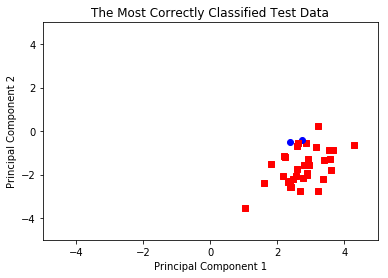

In [51]:
my_label = []
my_label1 = []
my_label2 = []
my_label3 = []
my_label4 = []

my_projx1 = foldK(projx1)
new_labels1 = foldKlabel(labels)
my_projx2 = foldK(my_projx1)
new_labels2 = foldKlabel(new_labels1)
my_projx3 = foldK(my_projx2)
new_labels3 = foldKlabel(new_labels2)
my_projx4 = foldK(my_projx3)
new_labels4 = foldKlabel(new_labels3)

clf = GaussianNB()
clf.fit(np.transpose(projx1[:, 0:139]), labels[0:139])
for i in range(140,178):
    my_label.append(clf.predict([np.transpose(projx1[:,i])]))
    
my_label = np.asarray(my_label)

clf = GaussianNB()
clf.fit(np.transpose(my_projx1[:, 0:139]), new_labels1[0:139])
for i in range(140,178):
    my_label1.append(clf.predict([np.transpose(my_projx1[:,i])]))
    
my_label1 = np.asarray(my_label1)

clf = GaussianNB()
clf.fit(np.transpose(my_projx2[:, 0:139]), new_labels2[0:139])
for i in range(140,178):
    my_label2.append(clf.predict([np.transpose(my_projx2[:,i])]))
    
my_label2 = np.asarray(my_label2)

clf = GaussianNB()
clf.fit(np.transpose(my_projx3[:, 0:139]), new_labels3[0:139])
for i in range(140,178):
    my_label3.append(clf.predict([np.transpose(my_projx3[:,i])]))
    
my_label3 = np.asarray(my_label3)

clf = GaussianNB()
clf.fit(np.transpose(my_projx4[:, 0:139]), new_labels4[0:139])
for i in range(140,178):
    my_label4.append(clf.predict([np.transpose(my_projx4[:,i])]))
    
my_label4 = np.asarray(my_label4)

error = [0, 0, 0, 0, 0]

for i in range(0, 35):
    if (my_labels[i]!=labels[i]):
        error[0] = error[0] +1
        
for i in range(0, 35):
    if (my_labels1[i]!=labels[35+i]):
        error[1] = error[1] +1
        
for i in range(0, 35):
    if (my_labels2[i]!=labels[70+i]):
        error[2] = error[2] +1
        
for i in range(0, 35):
    if (my_labels3[i]!=labels[105+i]):
        error[3] = error[3] +1
        
for i in range(0, 35):
    if (my_labels4[i]!=labels[140+i]):
        error[4] = error[4] +1
        
print("The errors of each of K fold trials is: " + str(error))
print("The mean accuracy: " + str(np.mean(error)))
print("The variance of the accuracy: " + str(np.var(error)))

for i in range(0,35):
    if(my_labels[i]==0):
        plt.scatter(projx1[0,i], projx1[1,i], c='r', marker='s')
    if(my_labels[i]==1):
        plt.scatter(projx1[0,i], projx1[1,i], c='g', marker='^')
    if(my_labels[i]==2):
        plt.scatter(projx1[0,i], projx1[1,i], c='b', marker='o')
plt.title("The Most Correctly Classified Test Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axis([-5, 5, -5, 5])
plt.show()

The mean and variance of the accuracy for Case II and Case III are identical. We can see that the mean accuracy is slightly (23.2 compared to 26 for Case II/III and Case I respectively) better in the standardized dataset while the variance is slightly better in the mean centered dataset (185.26 compared to 184 for Case II/III and Case I respectively). This might be due to the fact that we are only classifying three classes, so the accuracy is probably artifically inflated since there is a good chance of the classifier predicting between three choices. If there were more classes, the standardized data would be much better as it is much easier to separate the data into its distinct classes compared to just the mean centered data, which involved a lot of overlap.